<a href="https://colab.research.google.com/github/OscarCanongo/Santander-DataScience-Python/blob/main/FinalProjectPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Procesamiento de Datos con Python - Proyecto Final**

**Equipo 24:**
- **Oscar Cañongo** - \*\* - [OscarCanongo](https://github.com/OscarCanongo)
- **Andres** - \*\* - [andresam0301](https://github.com/andresam0301)
- **Daniel Arellano** - \*\* - [Tachuelin](https://github.com/Tachuelin)
- **Miguel Toledo** - \*\* -[josemigueltr](https://github.com/josemigueltr)

# **Indentificación del problema**

El tema elegido para analizar en este proyecto corresponde al *análisis de gravedad y letalidad del virus SARS-CoV-2(Covid-19)*,esto  debido a que en el anterior proyecto correspondiente al modulo [**Análisis de datos con R**](https://github.com/OscarCanongo/Santander-DataScience)
, se trabajo de igual manera con este tema y aun mas importante por la situación mundial que se esta viviendo, nos parece de gran importancia el poder realizar este análisis para poder  tener una visión mucho mas detallada sobre esta situación y así mismo el poder responder a muchas interrogantes que han surgido desde el momento que inicio la pandemia. Las cuales algunas veces no son tan sencillas de responder debido a la gran  cantidad de información con la que se cuenta, o inclusive por que los datos mostrados no son lo suficientemente claros como para ser entendibles por todas las personas.


Es por todo lo anterior que en este análisis planemos hacer un procesamiento de datos de diferentes datasets los cuales recolectamos de la siguientes maneras: **Bancos de información(Datasets), Consulta de Apis, etc.**.Todo esto con el fin de poder hacer un pequeño análisis de dicha información recolectada la cual nos permita responder las siguientes preguntas que nos fuimos planteando al momento de estar investigando sobre el tema en cuestión.











#**Planteamiento de preguntas**




Este planteamiento se baso en explicar de una forma mas detallada el impacto que esta pandemia **SARS-CoV-2(Covid-19)**, ha tenido en todo nuestro país, desde afectaciones a la economía, a la deserción escolar y por su puesto, el aumento en casos de enfermedades respiratorias, crónicas y muchísimas otras más, las cuales representaron un alto riesgo para la población mexicana en todo este periodo que ha transcurrido la pandemia. 

*   **¿Cuál es la situación actual del coronavirus?**

*   **¿Qué tipo de padecimientos o personas con padecimientos de distintas edades y sexo han sido mas afectados a causa de la pandemia SARS-CoV-2(Covid-19)?**

*   **¿Qué repercusiones económicas ha tenido la pandemia SARS-CoV-2(Covid-19) en México?**
*   **¿Cuáles han sido las repercusiones en el ámbito laboral y escolar a causa de la pandemia SARS-CoV-2(Covid-19)?**






## **Comenzando** 🚀

_Puedes descargar el repositorio de [**GitHub**](https://github.com/OscarCanongo/Santander-DataScience-Python) y consultar el Código en lenguaje de programación Python sobre el análisis realizado de las siguientes maneras:_

- Dando clic en **Code** en el repositorio y después **Download ZIP**..
- Haciendo un **Git clone** del repositorio directamente en tu computadora

### **Prerrequisitos** 📋

_Para poder observar en análisis, gráficas y datos que se presentan en este proyecto, debes tener instalado el lenguaje de programación **Python** en tu ordenador, así como cualquier IDE que pueda soportar este lenguaje, te recomendamos "VScode", "Anaconda", "JupiterNotebooks", pero una opción mas sencilla es utilizar y ejecutar este script en Google Colab si así lo deseas._

# **Colecciones de Datos**

*   [Open Disease Data - API](https://corona.lmao.ninja/) - API utilizada para obtener los contagios, las muertes y los recuperados actuales por país de COVID-19

*   [Proyectos México - Web Scrapping](https://www.proyectosmexico.gob.mx/) - Página web utilizada para realizar Web Scrapping y así obtener datos de las variaciones del PIB y tasa de desempleo desde el 2008

*   [Encuesta Nacional sobre Disponibilidad y Uso de Tecnologías de la información en los Hogares(2019)](https://www.datos.gob.mx/busca/dataset/encuesta-nacional-sobre-disponibilidad-y-uso-de-tecnologias-de-la-informacion-en-los-hogares-en/resource/53904381-5793-4fec-bd63-3c6ef6ff62f6
) - Dataset utilizado para conocer la disponibilidad y el uso de las tecnologias TIC en los hogares de mexico  

* [Datos para el monitoreo del COVID-19 en México](https://github.com/mexicovid19/Mexico-datos) - Es un repositorio que se utiliza para analizar y extraer datos generales del pais sobre la pandemia SARS-CoV-2(Covid-19)















# **Librerias utilizadas**

### **Instalación** 🔧

_Para el desarrollo del Código se utilizaron ciertas librerías de Python que facilitaron el análisis y la extracción de datos_

_Las librerías son las siguientes:_



In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
from datetime import datetime

# **El Coronavirus actualmente**


# Análisis Exploratorio de datos

In [ ]:
#Url para obtener casos actuales de COVID
url = 'https://corona.lmao.ninja/v2/historical?lastdays=1'

In [ ]:
#Obtenemos la respuesta y la convertimos a json
r = requests.get(url)
json = r.json()

In [ ]:
#Revisamos la respuesta para ver los datos que tendremos
json[0]

{'country': 'Afghanistan',
 'province': None,
 'timeline': {'cases': {'3/7/21': 55847},
  'deaths': {'3/7/21': 2449},
  'recovered': {'3/7/21': 49378}}}

# Limpieza de datos

In [ ]:
#Declaramos un dataframe para guardar los datos con el nombre de las columnas que vamos a necesitar
df = pd.DataFrame(columns=['country', 'cases', 'deaths', 'recovered'])

In [ ]:
#Agregamos los datos de la consulta y limpiamos el Json para formar un dataset  
for x in json:
  df=df.append({'country' : x.get("country") , 'cases' : list(x.get("timeline").get("cases").values())[0], 'deaths' : list(x.get("timeline").get("deaths").values())[0], 'recovered':list(x.get("timeline").get("recovered").values())[0]}, ignore_index=True)

# Transformación de datos




In [ ]:
#Como nuestro dataset se repiten los países, ya que está dividido por regiones, se deben de agrupar los casos por país
df = df.groupby(['country']).sum()

In [ ]:
#Vemos qué países tienen más casos confirmados y tomamos los 20 con más casos para graficar
casos = df.sort_values(by=['cases'], ascending=False).head(15)

In [ ]:
#Ahora veamos el top quince de países con más muertes  
muertes = df.sort_values(by=['deaths'], ascending=False).head(15)

# Resultados

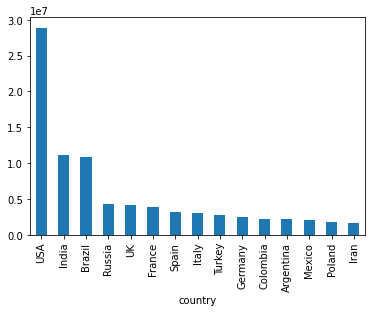

In [ ]:
#Creamos la gráfica de barras para ver el top quince de países con más infectados
casos['cases'].plot.bar()

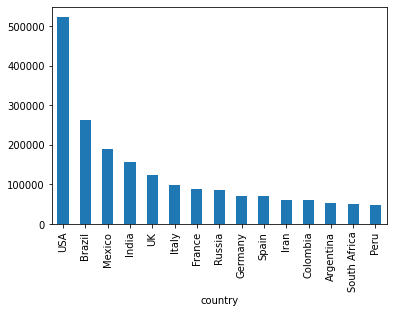

In [ ]:

muertes['deaths'].plot.bar()

#México ocupa el tercer lugar!!

# **Analisis de afectaciones por covid-19 en México, considerando la edad y sexo, en todo el 2020**

## Analisis exploratorio de datos

* Importando datasets en formato .csv

In [ ]:
# Importando las librerias necesarias
%matplotlib inline

pd.set_option('display.max_columns', 50)
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
general = pd.read_csv('https://raw.githubusercontent.com/OscarCanongo/Santander-DataScience-Python/main/datasets/covid-19_general_MX.csv')
general.rename( columns={'Unnamed: 0' :'#'}, inplace=True )

print(general.shape)
display(general.head())
print(general.info())

(684804, 26)


,#,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_CON,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI
0,0,4,2,1,2,1,2020-04-07,2020-04-04,9999-99-99,97,2,28,1,2,2,2,2,2,1,2,2,2,2,99,1,97
1,1,4,9,2,9,2,2020-04-15,2020-04-07,2020-04-16,2,2,76,1,1,2,2,1,1,2,2,1,1,2,99,1,2
2,2,4,25,1,25,1,2020-04-11,2020-04-07,9999-99-99,97,2,42,1,2,2,2,2,2,2,2,2,2,2,99,1,97
3,3,4,2,2,2,1,2020-04-17,2020-04-05,9999-99-99,97,2,45,1,2,2,2,2,2,2,2,2,2,2,99,1,97
4,4,4,28,1,28,2,2020-04-17,2020-04-10,9999-99-99,2,2,38,1,2,2,2,2,2,2,2,2,2,2,99,1,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684804 entries, 0 to 684803
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   #               684804 non-null  int64 
 1   SECTOR          684804 non-null  int64 
 2   ENTIDAD_UM      684804 non-null  int64 
 3   SEXO            684804 non-null  int64 
 4   ENTIDAD_RES     684804 non-null  int64 
 5   TIPO_PACIENTE   684804 non-null  int64 
 6   FECHA_INGRESO   684804 non-null  object
 7   FECHA_SINTOMAS  684804 non-null  object
 8   FECHA_DEF       684804 non-null  object
 9   INTUBADO        684804 non-null  int64 
 10  NEUMONIA        684804 non-null  int64 
 11  EDAD            684804 non-null  int64 
 12  NACIONALIDAD    684804 non-null  int64 
 13  DIABETES        684804 non-null  int64 
 14  EPOC            684804 non-null  int64 
 15  ASMA            684804 non-null  int64 
 16  INMUSUPR        684804 non-null  int64 
 17  HIPERTENSION    684804 non-nu

## Limpieza y Transformación de datos

In [ ]:
# Realizando limpieza de datos

from sklearn.preprocessing import StandardScaler
features = general.copy()

# Modificando datos de fechas
features['FECHA_INGRESO'] = pd.to_datetime(features['FECHA_INGRESO'])
features['FECHA_SINTOMAS'] = pd.to_datetime(features['FECHA_SINTOMAS'])
features['MUERTE'] = (features['FECHA_DEF'] != '9999-99-99').replace([True, False], [1, 0])
features['FECHA_DEF'].replace({'9999-99-99': '2099-01-01'}, inplace=True)
features['FECHA_DEF'] = pd.to_datetime(features['FECHA_DEF'])
features['DIAS'] = (features['FECHA_DEF'] - features['FECHA_SINTOMAS']).dt.days


In [ ]:
# Seleccionando entradas y salidas
cond_headers = ['DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', 'OTRA_CON']
outcome_headers = ['NEUMONIA', 'INTUBADO', 'UCI', 'MUERTE']

# Formato con caracteristicas binarias
binary_headers = list(set(features.columns) - set(['index', 'EDAD']))
features[binary_headers] = features[binary_headers].replace({1: 1, 2: 0, 3: np.nan, 97: np.nan, 98: np.nan, 99: np.nan})
features.loc[:] = features.dropna()

In [ ]:
# Seleccionando solo los casos de COVID, se eliminan las columnas que no se usan
# o no tienen tanta importancia en el analisis
infectados = features[features['RESULTADO'] == 1]
infectados = infectados.drop(columns=['SECTOR', 'ENTIDAD_UM', 'ENTIDAD_RES', 'TIPO_PACIENTE', 'NACIONALIDAD', 
                                'OTRO_CASO', 'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'RESULTADO', '#'])

feature_headers = list(set(infectados.columns) - set(outcome_headers))

display(infectados.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36258 entries, 2826 to 274997
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SEXO            36258 non-null  float64
 1   INTUBADO        36258 non-null  float64
 2   NEUMONIA        36258 non-null  float64
 3   EDAD            36258 non-null  float64
 4   DIABETES        36258 non-null  float64
 5   EPOC            36258 non-null  float64
 6   ASMA            36258 non-null  float64
 7   INMUSUPR        36258 non-null  float64
 8   HIPERTENSION    36258 non-null  float64
 9   OTRA_CON        36258 non-null  float64
 10  CARDIOVASCULAR  36258 non-null  float64
 11  OBESIDAD        36258 non-null  float64
 12  RENAL_CRONICA   36258 non-null  float64
 13  TABAQUISMO      36258 non-null  float64
 14  UCI             36258 non-null  float64
 15  MUERTE          36258 non-null  float64
 16  DIAS            36258 non-null  float64
dtypes: float64(17)
memory usage

None

## Resultados 

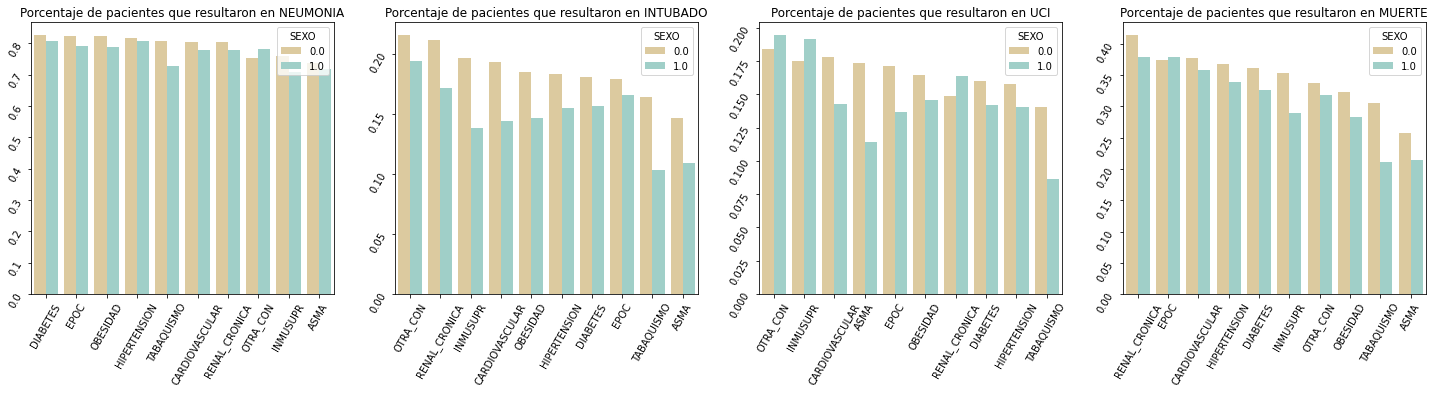

In [ ]:
# Pacientes que resultaron con algun padecimiento al contraer Covid-19

fig, ax = plt.subplots(1, len(outcome_headers), figsize=(25,5))
for i, target in enumerate(outcome_headers):
    groups = infectados[cond_headers + [target, 'SEXO']].groupby([target, 'SEXO']).sum()
    groups = groups.unstack().unstack().reset_index(name='count')
    groups.replace('SEXO', {0:'HOMBRE', 1:'MUJER'}, inplace=True)

    alive = groups[groups[target]==0]
    dead = groups[groups[target]==1].copy()
    rate = dead['count'] / (dead['count'] + alive['count'].values)
    dead['rate']=rate

    sns.barplot(data=dead.sort_values('rate', axis='rows', ascending=False),
                ax=ax[i],
                x='level_0',
                y='rate',
                hue='SEXO',
                palette=sns.color_palette("BrBG", 2))
    ax[i].tick_params(labelrotation=60)
    ax[i].set_title('Porcentaje de pacientes que resultaron en ' + target)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

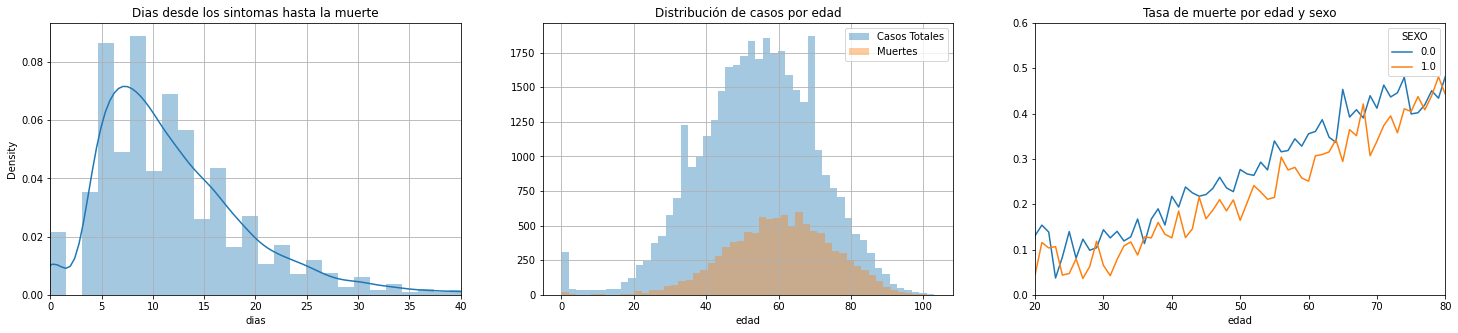

In [ ]:
# Histogramas de comparación de muertes por edades y sexo

fig, ax = plt.subplots(1, 3, figsize=(25, 5))
ax[0].grid()
ax[1].grid()

# Realizando histograma de muertes
data = infectados[infectados['MUERTE']==1]['DIAS']
sns.distplot(data, ax = ax[0]).set_title('Dias desde los sintomas hasta la muerte')
ax[0].set_xlabel('dias')
plt.sca(ax[0])
plt.xlim(0, 40)

# Histograma de edades
data = infectados['EDAD']
sns.distplot(data,
             hist=True, 
             kde=False, 
             ax=ax[1], 
             label='Casos Totales').set_title('DIstribución de muerte por edad')
data = infectados[infectados['MUERTE']==1]['EDAD']
sns.distplot(data, 
             hist=True,
             kde=False,
             ax=ax[1],
             label='Muertes').set_title('Distribución de casos por edad')
ax[1].legend()
ax[1].set_xlabel('edad')

# Death histogram
sns.lineplot(data=infectados.replace('SEXO', {0: 'Hombre', 1: 'Mujer'}),
             x='EDAD',
             y='MUERTE',
             hue='SEXO',
             ci=None,
             ax=ax[2]).set_title('Tasa de muerte por edad y sexo')
ax[2].set_xlabel('edad')
ax[2].set_ylabel('')
plt.sca(ax[2])
plt.xlim(20, 80)
plt.ylim(0, .6)

plt.show()

# **Repercusiones ecónomicas en México a causa de la Pandemia**






# Producto Interno Bruto (PIB)

# Análisis Exploratorio

In [ ]:
# Pandas te permite hacer web scrapping de una manera sencilla, con read_html te traes como df las tablas que tenga el sitio web
pib = pd.read_html("https://www.proyectosmexico.gob.mx/por-que-invertir-en-mexico/economia-solida/crecimiento-economico/sd_tasa-de-desempleo-paises-miembros-de-la-ocde/")

In [ ]:
#Transformamos la lista en un dataframe
df = pd.DataFrame(pib[0])

In [ ]:
#Revisamos el dataframe y vemos qué datos contiene 
df

,wdt_ID,Año,Variación anual
0,3,2008,1.40
1,4,2009,-4.70
2,5,2010,5.10
3,6,2011,4.00
4,7,2012,4.00
5,8,2013,1.40
6,9,2014,2.20
7,10,2015,2.50
8,11,2016,2.40
9,12,2017,2.20


# Limpieza de datos

In [ ]:
#Agregamos algunas filas que no se vinieron
df=df.append({'Año' : str(2018), 'Variación anual': 2.02 }, ignore_index=True)
df=df.append({'Año' : str(2019), 'Variación anual': -0.10 }, ignore_index=True)
df=df.append({'Año' : str(2020), 'Variación anual': -8.50 }, ignore_index=True)

In [ ]:
#Eliminamos la fila 10 que no nos servirá 
df = df.drop(10,axis=0)

In [ ]:
#Eliminamos columna wdt_ID el cual tampoco nos servirá
df = df.drop('wdt_ID',axis=1)

# Transformación de datos


In [ ]:
#Como la variación anual está como string se debe de pasar a valores númericos para poder gráficar
df['Variación anual'] = pd.to_numeric(df['Variación anual'])


# Resultados


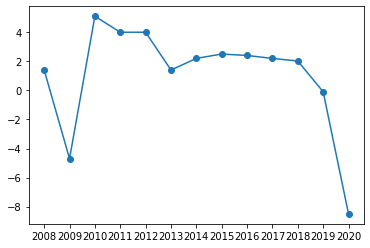

In [ ]:
# Gráficamos los resultados con matplotlib
plt.plot( 'Año', 'Variación anual', data=df, linestyle='-', marker='o')


# Tasa de desempleo



# Análisis Exploratorio

In [ ]:
# Pandas te permite hacer web scrapping de una manera sencilla, con read_html te traes como df las tablas que tenga el sitio web
desempleo = pd.read_html("https://www.proyectosmexico.gob.mx/por-que-invertir-en-mexico/mercado-potencial/sd_historico-tasa-de-desempleo-en-mexico/")

In [ ]:
#Transformamos la lista en un dataframe
df = pd.DataFrame(desempleo[0])

In [ ]:
#Revisamos el dataframe y vemos qué datos contiene 
df

,wdt_ID,Año,Tasa de Desempleo
0,1,2006,3.20
1,2,2007,3.40
2,3,2008,3.50
3,4,2009,5.10
4,5,2010,5.10
5,6,2011,5.30
6,7,2012,4.90
7,8,2013,4.90
8,9,2014,4.60
9,10,2015,4.20


# Limpieza de datos

In [ ]:
#Agregamos algunas filas que no se vinieron
df=df.append({'Año' : str(2016), 'Tasa de Desempleo': 3.90 }, ignore_index=True)
df=df.append({'Año' : str(2017), 'Tasa de Desempleo': 3.40 }, ignore_index=True)
df=df.append({'Año' : str(2018), 'Tasa de Desempleo': 3.60 }, ignore_index=True)
df=df.append({'Año' : str(2019), 'Tasa de Desempleo': 3.10 }, ignore_index=True)
df=df.append({'Año' : str(2020), 'Tasa de Desempleo': 4.50 }, ignore_index=True)

In [ ]:
#Eliminamos la fila 0,1,2,10 que no nos servirá 
df = df.drop(0,axis=0)
df = df.drop(1,axis=0)
df = df.drop(2,axis=0)
df = df.drop(10,axis=0)
df

,wdt_ID,Año,Tasa de Desempleo
3,4,2009,5.10
4,5,2010,5.10
5,6,2011,5.30
6,7,2012,4.90
7,8,2013,4.90
8,9,2014,4.60
9,10,2015,4.20
11,NaN,2016,3.9
12,NaN,2017,3.4
13,NaN,2018,3.6


In [ ]:
#Eliminamos columna wdt_ID el cual tampoco nos servirá
df = df.drop('wdt_ID',axis=1)

# Transformación de datos


In [ ]:
#Como la variación anual está como string se debe de pasar a valores númericos para poder gráficar
df['Tasa de Desempleo'] = pd.to_numeric(df['Tasa de Desempleo'])


# Resultados


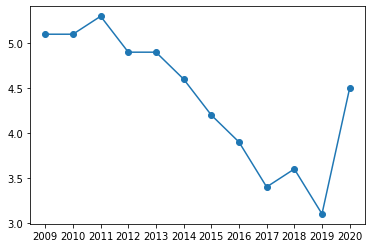

In [ ]:
# Gráficamos los resultados con matplotlib
plt.plot( 'Año', 'Tasa de Desempleo', data=df, linestyle='-', marker='o')

#**Causas de deserción escolar a causa de la pandemia**

> Bloque con sangría




#Análisis Exploratorio

In [ ]:
#Leemos el dataset en un dataframe de pandas
df=pd.read_csv('https://raw.githubusercontent.com/OscarCanongo/Santander-DataScience-Python/main/datasets/hogar_anual_2019.csv')

#vista previa del dataset
df.head(10)

,UPM,VIV_SEL,HOGAR,P4_1_1,P4_1_2,P4_1_3,P4_1_4,P4_1_5,P4_1_6,P4_2_1,P4_2_2,P4_2_3,P4_3,P4_3A,P4_4,P4_5,P4_6_1,P4_6_2,P4_6_3,P4_6_4,P4_6_5,P4_6_6,P4_6A,P4_7_1,P4_7_2,P4_7_3,P4_7_4,P4_7A,P4_8,P4_8A,P5_1,P5_2_1,P5_2_2,P5_3_1,P5_3_2,P5_4,P5_4A,P5_5,P5_6_1,P5_6_2,...,P5_6_4,P5_6_5,P5_7_1,P5_8_1,P5_9_1,P5_10_1,P5_7_2,P5_8_2,P5_9_2,P5_10_2,P5_7_3,P5_8_3,P5_9_3,P5_10_3,P5_7_4,P5_8_4,P5_9_4,P5_10_4,P5_7_5,P5_8_5,P5_9_5,P5_10_5,P5_7_6,P5_8_6,P5_9_6,P5_7_7,P5_8_7,P5_9_7,P5_7_8,P5_8_8,P5_9_8,P5_11_1,P5_11_2,P5_11_3,FAC_HOG,UPM_DIS,EST_DIS,DOMINIO,TLOC,ESTRATO
0,202427,1,1,2,2,2,1,1,2,2,2,2,2.0,NaN,1,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,2.0,2.0,2.0,NaN,NaN,1,1,1,...,1,2,2.0,NaN,NaN,NaN,1.0,800.0,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,2.0,1.0,2073,104,14,U,1,4
1,202427,2,1,1,2,2,1,1,2,2,1,1,NaN,NaN,1,1.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2.0,NaN,1,1,2,...,1,2,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,440.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,3.0,1.0,2073,104,14,U,1,4
2,202427,5,1,2,2,2,1,1,2,2,2,1,NaN,NaN,1,3.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0,1.0,2.0,NaN,NaN,NaN,1,1.0,2.0,2.0,2.0,NaN,NaN,1,1,1,...,1,2,2.0,NaN,NaN,NaN,1.0,560.0,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,1.0,1.0,2073,104,14,U,1,4
3,202633,3,1,1,2,2,1,1,2,1,1,2,NaN,NaN,1,1.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2.0,NaN,2,1,2,...,1,2,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,440.0,NaN,1.0,3.0,3.0,2767,105,12,U,1,2
4,202633,4,1,2,2,2,1,1,2,2,2,2,1.0,NaN,1,3.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0,2.0,2.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,1.0,NaN,2,1,2,...,1,2,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,340.0,NaN,2.0,3.0,3.0,2767,105,12,U,1,2
5,202633,5,1,1,2,2,1,1,1,1,1,1,NaN,NaN,1,3.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0,2.0,2.0,NaN,NaN,NaN,1,1.0,2.0,2.0,2.0,NaN,NaN,1,1,1,...,1,2,2.0,NaN,NaN,NaN,1.0,700.0,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,1.0,1.0,2767,105,12,U,1,2
6,202633,1,1,1,1,1,2,1,2,2,2,2,1.0,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2,NaN,NaN,NaN,NaN,1.0,NaN,2,2,2,...,1,2,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,3.0,3.0,3.0,2767,105,12,U,1,2
7,202633,2,1,2,2,2,1,1,2,2,2,2,1.0,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2,NaN,NaN,NaN,NaN,1.0,NaN,2,2,2,...,1,2,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,3.0,3.0,3.0,2767,105,12,U,1,2
8,202817,1,1,2,1,2,1,1,1,1,2,1,NaN,NaN,1,3.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0,2.0,2.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2.0,NaN,2,1,2,...,1,2,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,700.0,NaN,1.0,3.0,3.0,2172,106,14,U,1,4
9,202817,2,1,1,2,2,1,1,2,2,1,2,NaN,NaN,1,3.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0,2.0,2.0,NaN,NaN,NaN,1,1.0,2.0,2.0,2.0,NaN,NaN,1,1,1,...,1,2,2.0,NaN,NaN,NaN,1.0,9999.0,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,1.0,1.0,2172,106,14,U,1,4


In [ ]:
#Revisamos el tipo de  datos de las columnas del dataframe
print(df.dtypes)

UPM         int64
VIV_SEL     int64
HOGAR       int64
P4_1_1      int64
P4_1_2      int64
            ...  
UPM_DIS     int64
EST_DIS     int64
DOMINIO    object
TLOC        int64
ESTRATO     int64
Length: 81, dtype: object


# Limpieza de datos

In [ ]:

#Como este dataset contiene muchas columnas con informacion, solamente tomaremos aquellas que se utilizarán 
#y las guardaremos en otro dataframe
df_hogar=df[['P4_1_2','P4_1_3','P4_1_4','P4_1_5','P4_2_1','P4_2_2',
       'P4_4','ESTRATO','DOMINIO']]


#Renombramos las columnas del dataframe
renombrado={'P4_1_2':'Televisor_analogico','P4_1_3':'Televisor_con_decodificador','P4_1_4':'Televisor_digital','P4_1_5':'Telefono_celular','P4_2_1':'Computadora_escritorio','P4_2_2':'Laptop',
       'P4_4':'Internet','ESTRATO':'Estrato_socioeconomico','DOMINIO':'Tipo_de_entorno'}
df_hogar=df_hogar.rename(columns=renombrado)

#Transformación de Datos

In [ ]:

#Realizamos un mapeo de los datos algunas columnas para que sea mucho mas facil de leer
#1-Si
#2-No
trans_respuestas = {
    1: 'Si',
    2: 'No',
}

#columnas a las cuales se mapearan su valores
columnas={'Televisor_analogico','Televisor_con_decodificador','Televisor_digital','Telefono_celular','Computadora_escritorio','Laptop',
       'Internet'}

for col in columnas:
    df_hogar[col]=df_hogar[col].map(trans_respuestas)


#Realizamos un mapeo de los datos de  la columna Tipo_de_entorno
trans_tipo_ent = {
    'U': 'Urbano',
    'R': 'Rural',
}

df_hogar['Tipo_de_entorno']=df_hogar['Tipo_de_entorno'].map(trans_tipo_ent)


#Realizamos un mapeo de los datos de  la columna Estrato_socieconomico
trans_tipo_estrato_soc = {
   1:'Bajo',
   2:'Medio bajo', 
   3: 'Medio alto',
   4: 'Alto'
}

df_hogar['Estrato_socioeconomico']=df_hogar['Estrato_socioeconomico'].map(trans_tipo_estrato_soc)

#Revisamos el tipo final de los datos de las columnas
print(df_hogar.dtypes)

Televisor_analogico            object
Televisor_con_decodificador    object
Televisor_digital              object
Telefono_celular               object
Computadora_escritorio         object
Laptop                         object
Internet                       object
Estrato_socioeconomico         object
Tipo_de_entorno                object
dtype: object


In [ ]:
#Vista final del dataframe ya limpiado y transformado
df_hogar.head(10)

,Televisor_analogico,Televisor_con_decodificador,Televisor_digital,Telefono_celular,Computadora_escritorio,Laptop,Internet,Estrato_socioeconomico,Tipo_de_entorno
0,No,No,Si,Si,No,No,Si,Alto,Urbano
1,No,No,Si,Si,No,Si,Si,Alto,Urbano
2,No,No,Si,Si,No,No,Si,Alto,Urbano
3,No,No,Si,Si,Si,Si,Si,Medio bajo,Urbano
4,No,No,Si,Si,No,No,Si,Medio bajo,Urbano
5,No,No,Si,Si,Si,Si,Si,Medio bajo,Urbano
6,Si,Si,No,Si,No,No,No,Medio bajo,Urbano
7,No,No,Si,Si,No,No,No,Medio bajo,Urbano
8,Si,No,Si,Si,Si,No,Si,Alto,Urbano
9,No,No,Si,Si,No,Si,Si,Alto,Urbano


#Resultados

In [ ]:
#Leeemos el dataset ya preprocesado
df=pd.read_csv('https://raw.githubusercontent.com/OscarCanongo/Santander-DataScience-Python/main/datasets/hogar_anual_2019_preprocesado.csv')

#Obtenemos informacion de acuerdo a la cantidad de familias que pertenecen a cierto estrato de socieconomico
c=df.groupby(['Estrato_socioeconomico']).size()
c.to_frame()
#df[].plot.bar()



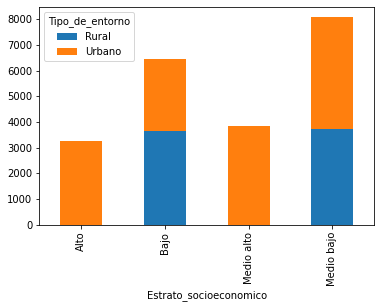

In [ ]:
#Observamos un poco mas a detalle la cantidad de familias pertenecientes a entornos y niveles socioeconomico
ent=df.groupby('Estrato_socioeconomico')['Tipo_de_entorno'].value_counts()

graf=ent.groupby(['Estrato_socioeconomico', "Tipo_de_entorno"]).mean().unstack()
graf.plot(kind='bar', stacked=True)


In [ ]:
#Número de encuestados con acceso a un tipo de televisión
tg=df.groupby(['Estrato_socioeconomico','Televisor_analogico','Televisor_con_decodificador','Televisor_digital',]).size()
d = {'Estrato_socioeconomico':["Alto","Bajo","Medio alto","Medio bajo"],
     'No': [123/sum(c)*100, 964/sum(c)*100, 137/sum(c)*100, 545/sum(c)*100],
      'Si': [(3265-123)/sum(c)*100,(6466-964)/sum(c)*100,(3821-137)/sum(c)*100,(8068-545)/sum(c)*100]}
Datos_tv=pd.DataFrame(d)

In [ ]:
Datos_tv

,Estrato_socioeconomico,No,Si
0,Alto,0.568918,14.532840
1,Bajo,4.458834,25.448659
2,Medio alto,0.633673,17.039778
3,Medio bajo,2.520814,34.796485


In [ ]:
tc=df.groupby(['Estrato_socioeconomico','Computadora_escritorio','Laptop','Internet']).size()
e = {'Estrato_socioeconomico':["Alto","Bajo","Medio alto","Medio bajo"],
     'No': [339/sum(c)*100, 4531/sum(c)*100, 743/sum(c)*100, 3672/sum(c)*100],
      'Si': [(3265-339)/sum(c)*100,(6466-4531)/sum(c)*100,(3821-743)/sum(c)*100,(8068-3672)/sum(c)*100]}
Datos_pc=pd.DataFrame(e)

In [ ]:
Datos_pc

,Estrato_socioeconomico,No,Si
0,Alto,1.567993,13.533765
1,Bajo,20.957447,8.950046
2,Medio alto,3.436633,14.236818
3,Medio bajo,16.984274,20.333025


Text(0, 0.5, 'Porcentaje')

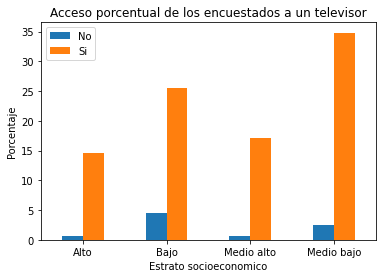

In [ ]:
Datos_tv.plot.bar(x='Estrato_socioeconomico', y=['No','Si'], rot=0)
plt.title("Acceso porcentual de los encuestados a un televisor")
plt.xlabel("Estrato socioeconomico")
plt.ylabel("Porcentaje")

Text(0, 0.5, 'Porcentaje')

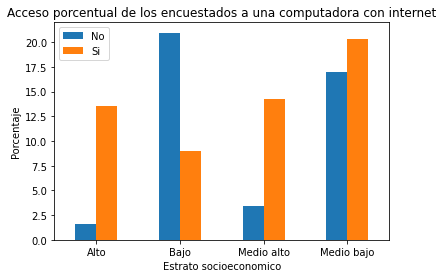

In [ ]:
Datos_pc.plot.bar(x='Estrato_socioeconomico', y=['No','Si'], rot=0)
plt.title("Acceso porcentual de los encuestados a una computadora con internet")
plt.xlabel("Estrato socioeconomico")
plt.ylabel("Porcentaje")

# **Conclusión**

Actualmente México ocupa es el tercer país con más muertes por COVID-19 a nivel mundial. La situación es desalentadora, la mayoría de los contagios ocurren en personas de 50 a 60 años y la tasa de mortalidad va en aumento.

En cuestión económica las cosas no mejoran. El Producto Interno Bruto (PIB) va en declive y la tasa de desempleo en aumento.

Moviendonos al ambito escolar, lamentablemente las cosas siguen mal. La mayoría de las personas con una situación economica media-baja y baja (Alrededor del 50% de la población mexicana) no cuenta con una computadora con conexión a internet en su casa. Ante esto el gobierno optó por impartir clases mediante la televisión que la mayoría de los mexicanos tiene pero esto abre una brecha educativa entre clases. Los que tienen internet no van a resentir tanto la pandemia como quiénes se educan por medio de la tv. 

Esperamos que con la aplicación de vacunas las cosas puedan ir mejorando en nuestro país.